# Week 48

v0.0.0

In [1]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

------------------------------------------------------------------------

## 1 Analysis of a data set obeying Michaelis-Menten kinetics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
pd.set_option('display.max_rows', 6)

The kinetics for an enzyme were investigated using the absorbance of the
product to calculate the initial velocities for a range of different
initial concentrations of the substrate. The data given in the dataset
`analys-data-set-obeyin.xlsx` was obtained. Use these data to answer the
following questions.

In [3]:
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [4]:
df = uploader.get_dataframe()
display(df)

In [5]:
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('week49_2') # Load from package for the solution so it doesn't require to interact.
display(df)

39 rows × 2 columns

#### (a) SI Units

Convert the concentrations of substrate and the velocities to the SI
units $\text{M}$ and $\text{M}\cdot\text{s}^{-1}$, respectively.

In [7]:
## Your task: Add new columns with both properties in proper SI units. 
## Use the column names: '[S]_(M)' and 'V0_(M/s)'
df['[S]_(M)'] = df['[S]_(mM)'] * 10**(-3)
df['V0_(M/s)'] = df['V0_(uM/s)'] * 10**(-6)
display(df)

39 rows × 4 columns

#### (b) Plot & estimate

Plot the initial velocities, $V_0$, as a function of substrate
concentrations, $[S]$. Estimate $K_M$ and $V_\mathrm{max}$ from this
plot.

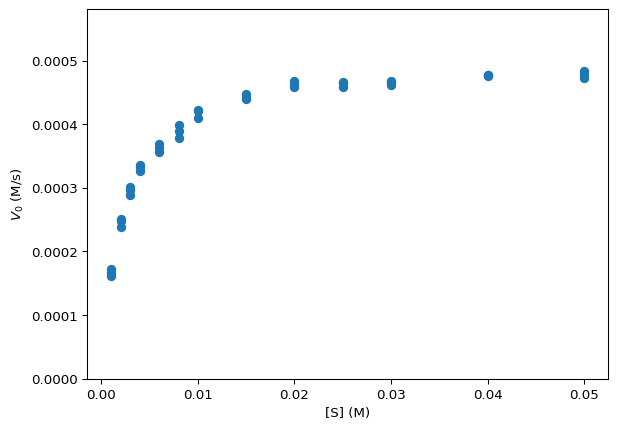

In [9]:
fig, ax = plt.subplots()

## Your task: Plot '[S]_(M)' vs 'V0_(M/s)'.
ax.plot(df['[S]_(M)'], df['V0_(M/s)'], 'o')

## Sets x and y-axis labels:
ax.set_xlabel('[S] (M)')
ax.set_ylabel('$V_0$ (M/s)')

## EXTRA: Sets the y-axis limits.
ax.set_ylim(0, df['V0_(M/s)'].max()*1.2)

Put your estimate of $K_M$ and $V_\text{max}$ in the cell below:

In [11]:
## Task: Put your estimate of the two parameters.
Vmax_estimate = 0.0005
K_M_estimate = 0.005

#### (c) Fit

Now we want to fit using the Michaelis-Menten equation, as per usual
when the task is fitting we have to define the function we are fitting
with

In [13]:
def michaelis_menten(S, K_M, Vmax):
    ## Your task: Implement the Michaelis-Menten equation.
    ## Be careful with parentheses.
    result = (Vmax * S) / (K_M + S)
    return result

And then we can follow our usual procedure to make the fit

In [15]:
initial_guess = [K_M_estimate, Vmax_estimate]

## Your task: Use curve_fit
fitted_parameters, trash = curve_fit(michaelis_menten, df['[S]_(M)'], df['V0_(M/s)'], initial_guess)

## Extracts and prints
K_M_fit, Vmax_fit = fitted_parameters
print(Vmax_fit)
print(K_M_fit)

0.0005007806028375277
0.0020861816467581044

How do these values compare to your estimate?

#### (d) Plot fit & data

Plot the fit alongside the data.

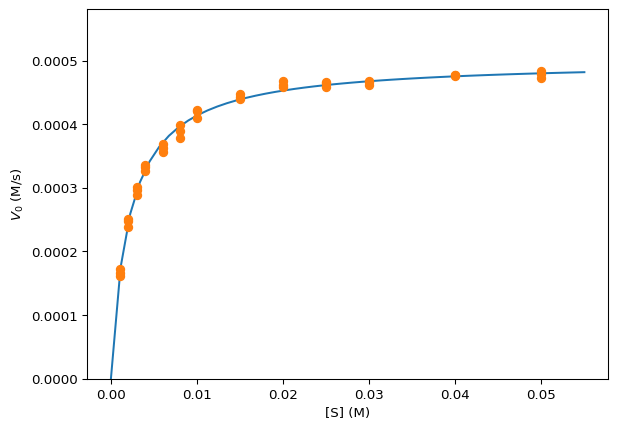

In [17]:
## Your task: Evaluate the fit
S_smooth = np.linspace(0, 0.055)
V0_fit = michaelis_menten(S_smooth, K_M_fit, Vmax_estimate)

## Your task: Make the plot 
fig, ax = plt.subplots()

## Your task: Make plot of the fit.
ax.plot(S_smooth, V0_fit)

## This plot the data and sets the options as before.
ax.plot(df['[S]_(M)'], df['V0_(M/s)'], 'o')

## Sets x and y-axis labels:
ax.set_xlabel('[S] (M)')
ax.set_ylabel('$V_0$ (M/s)')

## EXTRA: Sets the y-axis limits.
ax.set_ylim(0, df['V0_(M/s)'].max()*1.2)

#### (e) Enzyme concentration

The $k_{cat}$ of the enzyme was determined to be
$20000 \ \text{s}^{-1}$. Calculate, in the cell below, the concentration
of the enzyme used in the assay.

In [19]:
## Your task assign kcat to variable and calculate + print the enzyme_concentration
kcat = 20000
enzyme_concentration = Vmax_fit / kcat 
print(enzyme_concentration)

2.5039030141876384e-08

------------------------------------------------------------------------

## 2 The Michaelis Menten equation

Consider a reaction catalyzed by an enzyme obeying the Michaelis-Menten
kinetics model.

$$
E + S \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} ES \stackrel{k_2}{\rightarrow} E + P
$$

$$
V_0 = V_{\mathrm{max}} \frac{[S]}{[S] + K_M}
$$

#### (a) Enzyme saturation

Explain what is meant by enzyme saturation.

#### (b)

Calculate the level of enzyme saturation, $f_{ES}$, at substrate
concentrations of

-   $[S] = 0.1 \cdot K_M$
-   $[S] = 0.5 \cdot K_M$
-   $[S] = 1 \cdot K_M$
-   $[S] = 10 \cdot K_M$
-   $[S] = 100 \cdot K_M$

In [22]:
## Your task calculate the degree of enzyme saturation for the prescribed cases
f_ES_1 = 0.1 / (1 + 0.1)
f_ES_2 = 0.5 / (1 + 0.5)
f_ES_3 = 1 / (1 + 1)
f_ES_4 = 10 / (1 + 10)
f_ES_5 = 100 / (1 + 100)

print(f_ES_1, f_ES_2, f_ES_3, f_ES_4, f_ES_5)

0.09090909090909091 0.3333333333333333 0.5 0.9090909090909091 0.9900990099009901

In [23]:
## An alternative solution using a function
def enzyme_saturation(x):
    return x / (1 + x)

## Then use the function for each calculation
f_ES_1 = enzyme_saturation(0.1)
f_ES_2 = enzyme_saturation(0.5)
f_ES_3 = enzyme_saturation(1)
f_ES_4 = enzyme_saturation(10)
f_ES_5 = enzyme_saturation(100)
print(f_ES_1, f_ES_2, f_ES_3, f_ES_4, f_ES_5)

0.09090909090909091 0.3333333333333333 0.5 0.9090909090909091 0.9900990099009901

------------------------------------------------------------------------

#### (c) Calulate $K_m$

The Michaelis-Menten constant $K_M$ is defined as:

$$
K_M = \frac{k_{-1}+ k_2}{k_1}
$$

In a specific reaction, the following rate constants were determined:

-   $k_1 = 7 \cdot 10^7 \cdot \mathrm{M}^{-1}\cdot \mathrm{s}^{-1}$,
-   $k_{-1} = 8 \cdot 10^5 \ \mathrm{s}^{-1}$
-   $k_2 = 10^3 \ \mathrm{s}^{-1}$

Calculate the value of $K_M$. Does $K_M$ approximate the dissociation
constant for the $ES$ complex in this case?

In [26]:
k1 = 7 * 10**7
k2 = 10**3
k_m_1 = 8 * 10**5

K_M = (k_m_1 + k2) / k1
print(K_M)

0.011442857142857144

#### (d) Calculate $k_2$

Assume that a solution of an enzyme at a concentration of
$1 \cdot 10^{-7} \ \mathrm{M}$ with a substrate concentration of
$[S]=100\cdot K_M$ has
$V_0=10^{-4} \ \mathrm{M} \cdot \mathrm{min}^{-1}$

Given this information and with your answers to (b) and (c) in mind,
calculate the constant $k_2$. What is this constant also called?

In [29]:
## Your task: Assign known values
V0 = 1 * 10**(-4) # M / min
E_tot = 1 * 10**(-7) # M 

## Your task: Once you have figured out how to calculate k2, use Python to calculate it.
Vmax = V0 / f_ES_5
k2 = Vmax / E_tot
print(k2)

1010.0000000000001

#### (e) Lineweaver-Burk plot

The values of $V_\mathrm{max}$ and $K_M$ have historically been
determined from a Lineweaver-Burk plot.

How does the x- and y-intercepts in a Lineweaver-Burk plot relate to
$V_\mathrm{max}$ and $K_M$?

------------------------------------------------------------------------

## 3 Enzyme inhibitors (I)

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
pd.set_option('display.max_rows', 6)

An enzyme obeying the Michaelis-Menten kinetics model was tested for
substrate conversion in the absence and presence of an inhibitor, called
inhibitor1 at a concentration of
$[\textrm{I}] = 2.5 \cdot 10^{-3} \ \textrm{M}$. The data set is
contained in the file `enzyme-inhib-i.xlsx`. Using this data a
researcher wanted to determine the type of inhibition.

Start by loading the dataset

In [33]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [34]:
df = uploader.get_dataframe()
display(df)

In [35]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('week49_6') # Load from package for the solution so it doesn't require to interact.
display(df)

39 rows × 3 columns

#### (a) Convert units

Convert the concentrations of substrate and the initial velocities to
units given in M and $\mathrm{M}\cdot \mathrm{s}^{-1}$, respectively.

In [37]:
## Your task: Make new columns with the properties in SI units. 
df['[S]_(M)'] = df['[S]_(mM)'] * 10**(-3)
df['V0_no_inhib_(M/s)'] = df['V0_no_inhib_(uM/s)'] * 10**(-6)
df['V0_inhib_(M/s)'] = df['V0_inhib_(uM/s)'] * 10**(-6)
display(df)

39 rows × 6 columns

#### (b) Plot

Plot the initial velocities of both experiments as a function of
substrate concentration in one plot. Estimate $K_M$ and $V_\mathrm{max}$
in the presence and absence of inhibitor from the plot.

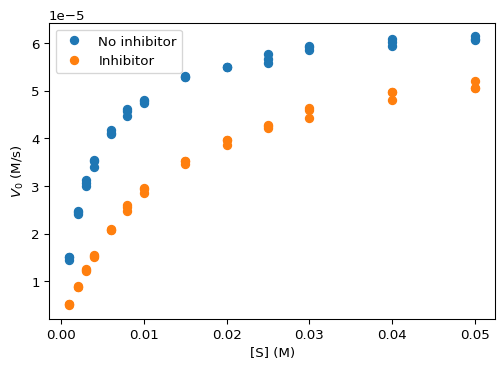

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))

## Your task: Plot the initial velocities for both experiments. 
ax.plot(df['[S]_(M)'], df['V0_no_inhib_(M/s)'], 'o', label='No inhibitor')
ax.plot(df['[S]_(M)'], df['V0_inhib_(M/s)'], 'o', label='Inhibitor')

## Sets the x and y-axis labels and shows the legend. 
ax.set_xlabel('[S] (M)')
ax.set_ylabel('$V_0$ (M/s)')
ax.legend()

Use the plots to estimate $K_M$ and $V_\mathrm{max}$ and assign in the
cell below

In [41]:
K_M_no_inhib_estimate = 0.0025 # Unit: M
Vmax_no_inhib_estimate = 6 * 10**(-5) # Unit: M/s

K_M_inhib_estimate = 0.01 # Unit: M 
Vmax_inhib_estimate = 6 * 10**(-5) # Unit: M/s

#### (c) Fit

The researcher wanted to determine $V_\mathrm{max}$ and $K_M$ values for
both experiments in order to correctly conclude on the type of
inhibitor.

Determine $V_\mathrm{max}$ and $K_M$ by fitting.

Start writing the function to fit with

In [43]:
## Your task: Implement the Michealis-Menten equation as a function
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (S + Km)

And use the `curve_fit`-function to find the parameters

In [45]:
## Your task: Make a fit to the Michealies-Menten equation for the data without the inhibitor.
initial_guess = [Vmax_no_inhib_estimate, K_M_no_inhib_estimate]
fitted_parameters, trash = curve_fit(michaelis_menten, df['[S]_(M)'], df['V0_no_inhib_(M/s)'], initial_guess)
Vmax_fit_no_inhib, K_M_fit_no_inhib = fitted_parameters

## Your task: Make a fit to the Michealies-Menten equation for the data the inhibitor.
initial_guess = [Vmax_inhib_estimate, K_M_inhib_estimate]
fitted_parameters, trash = curve_fit(michaelis_menten, df['[S]_(M)'], df['V0_inhib_(M/s)'], initial_guess)
Vmax_fit_inhib, K_M_fit_inhib = fitted_parameters

## Printing
print('Without inhibitor:')
print('    V_max:', Vmax_fit_no_inhib)
print('    K_M:', K_M_fit_no_inhib)
print('With inhibitor:')
print('    V_max:', Vmax_fit_inhib)
print('    K_M:', K_M_fit_inhib)

Without inhibitor:
    V_max: 6.495499633641784e-05
    K_M: 0.003410851437470283
With inhibitor:
    V_max: 6.3730854803554e-05
    K_M: 0.01220088316450348

#### (d) Analyze the fit

As per usual, we need to plot the fit to confirm that that it has been
done successfully.

We start by evaluating the fit for each set of parameters - those with
and those without the inhibitor.

In [47]:
## Your task: Evaluate the fits for both cases
S_smooth = np.linspace(0.0, 0.055)
V0_no_inhib_model = michaelis_menten(S_smooth, Vmax_fit_no_inhib, K_M_fit_no_inhib)
V0_inhib_model = michaelis_menten(S_smooth, Vmax_fit_inhib, K_M_fit_inhib)

Then we plot the fit along with the data

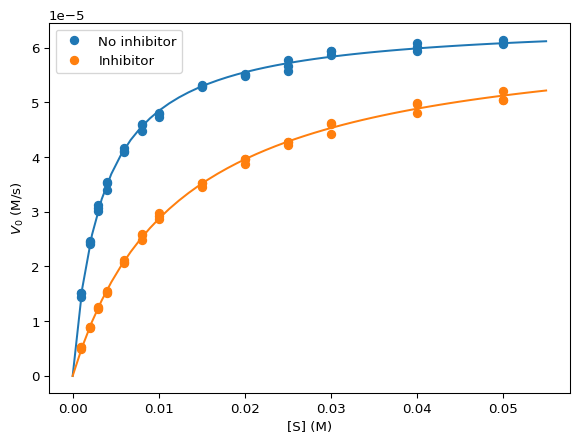

In [48]:
fig, ax = plt.subplots()

## Your task: Plot the fits: 
ax.plot(S_smooth, V0_no_inhib_model)
ax.plot(S_smooth, V0_inhib_model)

## Plots the data: 
ax.plot(df['[S]_(M)'], df['V0_no_inhib_(M/s)'], 'o', label='No inhibitor', color='C0')
ax.plot(df['[S]_(M)'], df['V0_inhib_(M/s)'], 'o', label='Inhibitor', color='C1')

## Sets the x and y-axis labels and shows the legend. 
ax.set_xlabel('[S] (M)')
ax.set_ylabel('$V_0$ (M/s)')
ax.legend()

#### (e) Inhibitor type

What type of inhibitor is inhibitor1?

#### (f) $K_i$

Calculate $K_i$ for the inhibitor using the relationship:

$$K_M^{\text{app}} = K_M \left(1 + \frac{[\text{I}]}{K_i}\right)$$

where $[\text{I}] = 2.5 \times 10^{-3}$ M is the inhibitor
concentration, and $K_M^{\text{app}}$ is the value we obtained by
fitting the data with the inhibitor and $K_M$ is the value we obtained
by fitting without.

In [51]:
## Your task: Set the inhibitor concentration in M.
I_concentration = 2.5e-3  # M

## Your task: Calculate K_i from the fitted K_M values
K_i = I_concentration / ((K_M_fit_inhib / K_M_fit_no_inhib) - 1)

print(K_i)

0.000970090764001574

------------------------------------------------------------------------

## 4 Enzyme inhibitors (II)

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
pd.set_option('display.max_rows', 6)

Two enzyme inhibitors were identified as part of a drug discovery
program. To characterize the mechanism of action, the reaction kinetics
were analysed for the enzyme alone and in the presence of 5 $\mu$M of
each of the inhibitors as a function of substrate concentration
resulting in the data in the file `enzyme-inhib-ii.xlsx`

Load the dataset

In [53]:
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [54]:
df = uploader.get_dataframe()
display(df)

In [55]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('week49_7') # Load from package for the solution so it doesn't require to interact.
display(df)

33 rows × 4 columns

#### (a) Convert & plot

Convert the measurements to SI units and plot the initial reaction
velocity versus substrate concentration for all three reactions.

Start by converting the units

In [57]:
## Your task: Add new columns with the properties in the correct SI units. 
## There are 4 properties, so you should add 4 columns. 
df['[S]_(M)'] = df['[S]_(uM)'] * 10**(-6)
df['enz_(M/s)'] = df['enz_(nM/s)'] * 10**(-9)
df['inhibitor2_(M/s)'] = df['inhibitor2_(nM/s)'] * 10**(-9)
df['inhibitor3_(M/s)'] = df['inhibitor3_(nM/s)'] * 10**(-9)

And then plot to visualize the data

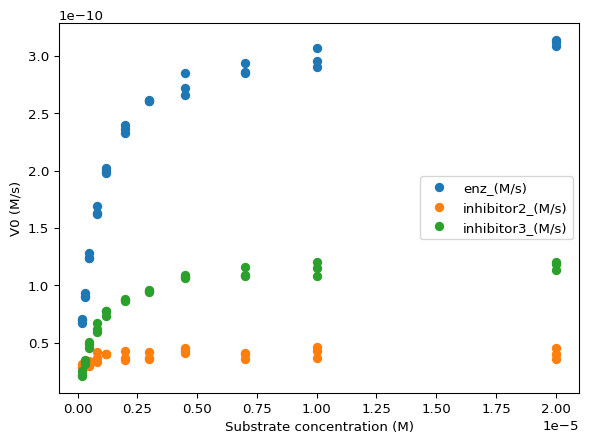

In [59]:
fig, ax = plt.subplots()

## Your task plot each data vs. [S]_(M).
ax.plot(df['[S]_(M)'], df['enz_(M/s)'], 'o', label='enz_(M/s)')
ax.plot(df['[S]_(M)'], df['inhibitor2_(M/s)'], 'o', label='inhibitor2_(M/s)')
ax.plot(df['[S]_(M)'], df['inhibitor3_(M/s)'], 'o', label='inhibitor3_(M/s)')

## Adds legend and axis labels. 
ax.legend()
ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('V0 (M/s)')
plt.show()

#### (b) Intuit parameters

Based on the appearance of these plots:

-   Can you determine the type of inhibition?
-   Alternatively, can you exclude some mechanisms?

Based on your answers what do you expect for the parameters $K_M$ and
$V_\mathrm{max}$?

-   Which dataset would have the highest $V_\mathrm{max}$, which the
    lowest?
-   What about $K_M$?

#### (c) Fit

As always, we need the function we’re fitting with

In [61]:
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (S + Km)

And then we can make the fit

In [63]:
## Your task fit dataset 1: 'enz_(M/s)'
initial_guess = [3*10**(-9), 0.25*10**(-5)]
fitted_parameters, trash = curve_fit(michaelis_menten, df['[S]_(M)'], df['enz_(M/s)'], initial_guess)
Vmax_enz_fit, K_M_enz_fit = fitted_parameters

## Your task fit dataset 2: 'inhibitor2_(M/s)'
initial_guess = [3*10**(-9), 0.25*10**(-5)]
fitted_parameters, trash = curve_fit(michaelis_menten, df['[S]_(M)'], df['inhibitor2_(M/s)'], initial_guess)
Vmax_inhib2_fit, K_M_inhib2_fit = fitted_parameters

## Your task fit dataset 3: 'inhibitor2_(M/s)'
initial_guess = [3*10**(-9), 0.25*10**(-5)]
fitted_parameters, trash = curve_fit(michaelis_menten, df['[S]_(M)'], df['inhibitor3_(M/s)'], initial_guess)
Vmax_inhib3_fit, K_M_inhib3_fit = fitted_parameters

print('Dataset 1: enz_(M/s)')
print('    V_max', Vmax_enz_fit)
print('    K_M', K_M_enz_fit)
print('Dataset 2: inhibitor2_(M/s)')
print('    V_max', Vmax_inhib2_fit)
print('    K_M', K_M_inhib2_fit)
print('Dataset 3: inhibitor3_(M/s)')
print('    V_max', Vmax_inhib3_fit)
print('    K_M', K_M_inhib3_fit)

Dataset 1: enz_(M/s)
    V_max 3.2194460122382126e-10
    K_M 7.505110277804259e-07
Dataset 2: inhibitor2_(M/s)
    V_max 4.0952644440159935e-11
    K_M 8.442553721173573e-08
Dataset 3: inhibitor3_(M/s)
    V_max 1.2316051281808638e-10
    K_M 7.913115764963332e-07

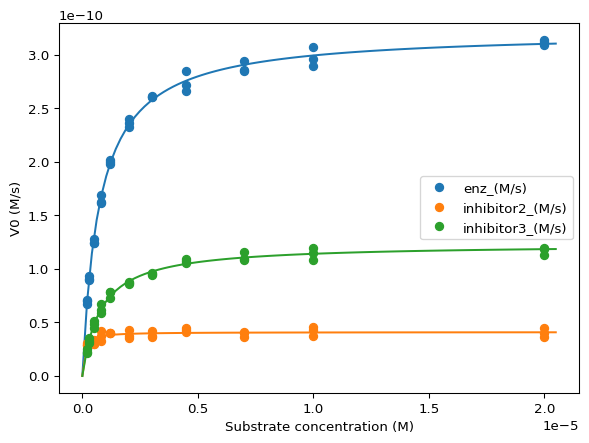

In [64]:
fig, ax = plt.subplots()

## Your task: Evaluate the fits
S_smooth = np.linspace(0, 2.05*10**(-5), 100)
V0_enz = michaelis_menten(S_smooth, Vmax_enz_fit, K_M_enz_fit)
V0_inhib2 = michaelis_menten(S_smooth, Vmax_inhib2_fit, K_M_inhib2_fit)
V0_inhib3 = michaelis_menten(S_smooth, Vmax_inhib3_fit, K_M_inhib3_fit)

## Plots the fits
ax.plot(S_smooth, V0_enz)
ax.plot(S_smooth, V0_inhib2)
ax.plot(S_smooth, V0_inhib3)

## Plots the data
ax.plot(df['[S]_(M)'], df['enz_(M/s)'], 'o', label='enz_(M/s)', color='C0')
ax.plot(df['[S]_(M)'], df['inhibitor2_(M/s)'], 'o', label='inhibitor2_(M/s)', color='C1')
ax.plot(df['[S]_(M)'], df['inhibitor3_(M/s)'], 'o', label='inhibitor3_(M/s)', color='C2')

## Adds legend and axis labels. 
ax.legend()
ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('V0 (M/s)')
plt.show()

If your fits don’t closely match the data, go back and change your
initial guesses.

#### (d) Change

In the fits above you will likely see that all the fitted parameters
change between the different data sets – some by a little and some by a
lot. How big does a change have to be to be considered significant?

#### (e) Inhibitor type

Based on the above, what is the likely inhibition type of inhibitor1 and
inhibitor3?

#### (f) $K_i$

Determine the $K_i$ for each of the two inhibitors. The inhibitor
concentration is 5 $\mu\mathrm{M}$.

In [68]:
## Your task: Assign known value
I = 5 * 10**(-6)

## Your task: Calculate K_I for both cases. 
## You should derive the correct expression before doing any coding!
K_I_inhib2 = I / (Vmax_enz_fit / Vmax_inhib2_fit - 1)
K_I_inhib3 = I / (Vmax_enz_fit / Vmax_inhib3_fit - 1)

## Prints the results
print('Inhibitor 2: ', K_I_inhib2)
print('Inhibitor 3: ', K_I_inhib3)

Inhibitor 2:  7.287155993523652e-07
Inhibitor 3:  3.0978463569655915e-06

------------------------------------------------------------------------

## 5 A snake dependent enzyme

When (or *if* depending on your outlook in life) you are bit by a cobra,
the snake protein CVF interacts with the human protein FB to form a
proteolytically active enzyme in the blood called CVF:FB. CVF:FB enzyme
is able to cleave another human protein known as C5 into C5b and C5a
(C5a is the protein you visually inspected in your first PyMOL session).
With C5 as a substrate, CVF:FB obeys the Michaelis-Menten kinetics
model, whereas CVF alone does not show any catalytic activity towards
C5.

Now consider two different CVF proteins, CVF1 and CVF2 from two
different cobra species. Upon characterization it was found that CVF1:FB
has a

-   $K_M = 0.036 \ \mu\text{M}$
-   $k_{cat} = 0.43 \ \mathrm{min}^{-1}$,

whereas CVF2:FB has

-   $K_M = 14 \ \mu\mathrm{M}$
-   $k_{cat} = 0.73 \ \mathrm{min}^{-1}$.

The concentration of C5 in blood is $0.37 \ \mu\mathrm{M}$.

#### (a) Variables & Units

Convert the given $K_M$ and the C5 concentration to SI-units given in
$\mathrm{M}$ and assign to variables. Also assign the given values of
$k_{cat}$ to variables.

In [71]:
## Your task: Assign the known values for CVF1
K_m_cvf1 = 0.036 * 10**(-6) # Unit: M
k_cat_cvf1 = 0.43           # Unit: 1/min

## Your task: Make variables and assign known values for CVF2
K_m_cvf2 = 14 * 10**(-6)    # Unit: M 
k_cat_cvf2 = 0.73           # Unit: 1/min

## Your task: Convert the concentration to SI units and assign it to the variable.
C_c5 = 0.37 * 10**(-6)      # Unit: M

#### (b) $V_\mathrm{max}$

Assuming that \[CVF1:FB\] $=$ \[CVF2:FB\]
$= 0.1\cdot 10^{-6} \ \mathrm{M}$, calculate $V_\mathrm{max}$ of both
enzymes.

In [73]:
## Your task: Calculate Vmax of both enzymes 
V_max_cfv1 = k_cat_cvf1 * 0.1 * 10**(-6)
V_max_cfv2 = k_cat_cvf2 * 0.1 * 10**(-6)

## Prints the results
print(V_max_cfv1)
print(V_max_cfv2)

4.3e-08
7.299999999999999e-08

#### (c) Complex fractions

Calculate the fraction of enzyme:substrate complexes (CVFx:FB:C5) in
blood.

In [75]:
theta_cfv1 = C_c5 / (K_m_cvf1 + C_c5)
theta_cfv2 = C_c5 / (K_m_cvf2 + C_c5)

print(theta_cfv1)
print(theta_cfv2)

0.9113300492610837
0.025748086290883786

#### (d) Initial velocity

Calculate the initial velocities of C5 cleavage in blood by the two
enzymes.

In [77]:
v0_cfv1 = (V_max_cfv1 * C_c5) / (K_m_cvf1 + C_c5)
v0_cfv2 = (V_max_cfv2 * C_c5) / (K_m_cvf2 + C_c5)

print(v0_cfv1)
print(v0_cfv2)

3.91871921182266e-08
1.8796102992345163e-09

#### (e) Best cleaver

Which of the two enzymes, CVF1:FB or CVF2:FB, cleaves the most C5
molecules in blood?

------------------------------------------------------------------------

## 6 Enzymatic behaviour of the enzyme ATCase

In [79]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display

The enzyme aspartate transcarbamoylase (ATCase) catalyzes the first
reaction in the biosynthesis of pyrimidines such as CTP as shown in the
reaction below:

![](https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/course/lessons/figures/atcase.png)

ATCase does not obey the Michaelis-Menten kinetics model but instead
shows the behaviour recorded in the `enzyme-behav-atcase.csv` dataset.

The dataset consists of three columns; the aspartate concentration in mM
and the rate of formation of N-carbamyolaspartate with and without the
presence of CTP.

Load the dataset with the widget below

In [80]:
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [81]:
df = uploader.get_dataframe()
display(df)

In [82]:
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('atcase') # Load from package for the solution so it doesn't require to interact.
display(df)

30 rows × 3 columns

#### (a) Units & Plot

In [83]:
## Your task: Add columns with the properties in SI units.
df['[aspartate]_(M)'] = df['[aspartate]_(mM)'] * 10**(-3)
df['rate_(M/s)'] = df['rate_(uM/s)'] * 10**(-6)
df['rate_ctp_(M/s)'] = df['rate_ctp_(uM/s)'] * 10**(-6)

Make a plot of the `without_ctp` versus the aspartate concentration.

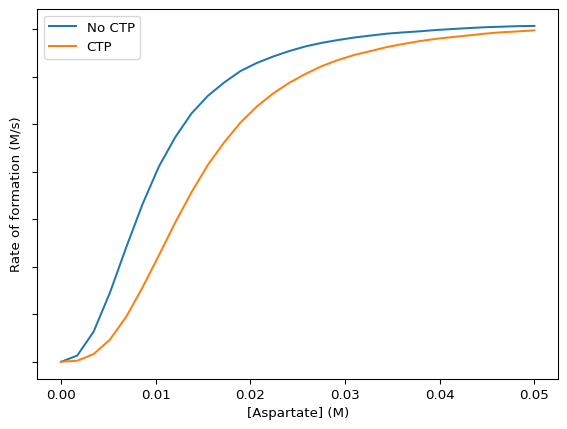

In [85]:
fig, ax = plt.subplots()

## Your task: Plot the datasets
ax.plot(df['[aspartate]_(M)'], df['rate_(M/s)'], label='No CTP')
ax.plot(df['[aspartate]_(M)'], df['rate_ctp_(M/s)'], label='CTP')

ax.set_xlabel('[Aspartate] (M)')
ax.set_ylabel('Rate of formation (M/s)')
ax.legend()
ax.set_yticklabels([]);

#### (b) Kinetic profile

Looking at the curve without CTP, describe the kinetic profile of ATCase
and explain what it tells us about the way ATCase works. (You may find
inspiration in the material previously covered on protein-ligand
interactions)

#### (c) Quarternary structure

What does the figure tell us about the quaternary structure of ATCase?

#### (d) DNA synthesis

Which other pyrimidine based trinucleotide besides CTP is used to
synthesize DNA?

#### (e) Effect of CTP

Qualitatively describe the effect of CTP on the rate of
N-carbamyolaspartate formation

#### (f) Physiological advantage

In fact many enzymes are regulated by certain end products in a fashion
similar to the CTP effect on ATCase. Can you explain why this might be a
physiological advantage?

#### (g) Regression with Hill equation.

Use regression to determine the Hill coefficient for each of the
datasets. Recall that the Hill equation is,

$$
\theta = \frac{[L]^h}{K + [L]^h}
$$

As usual start by writing a function implementing this equation

In [92]:
def hill_eq(L, K, h):
    return L**h / (K + L**h)

And then make the fit for each dataset

In [93]:
theta = df['rate_(M/s)'] / df['rate_(M/s)'].max()
theta_ctp = df['rate_ctp_(M/s)'] / df['rate_ctp_(M/s)'].max()

## Your task: Make the fits
fitted_parameters_noctp, _ = curve_fit(hill_eq, df['[aspartate]_(M)'], theta)
fitted_parameters_ctp, _ = curve_fit(hill_eq, df['[aspartate]_(M)'], theta_ctp)
 
K_fit_noctp, h_fit_noctp = fitted_parameters_noctp
K_fit_ctp, h_fit_ctp = fitted_parameters_ctp

print('Without CTP')
print(f'   K = {K_fit_noctp:.3e}')
print(f'   h = {h_fit_noctp:.3f}')
print('With CTP')
print(f'   K = {K_fit_ctp:.3e}')
print(f'   h = {h_fit_ctp:.3f}')

Without CTP
   K = 6.305e-06
   h = 2.543
With CTP
   K = 3.104e-06
   h = 2.945

Then we can plot

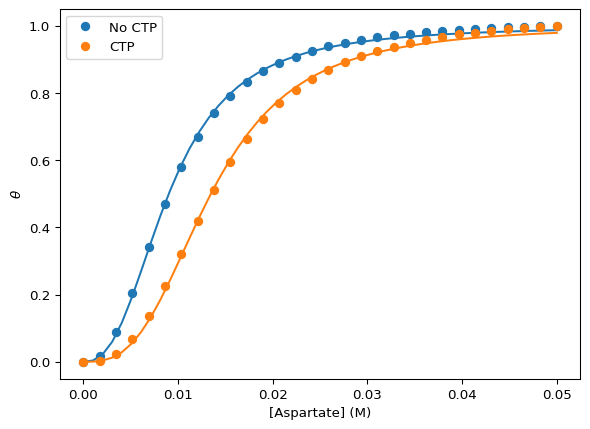

In [94]:
fig, ax = plt.subplots()

## Your task: Calculate the fits
L_smooth = np.linspace(0, 50*10**(-3))
theta_fit_noctp = hill_eq(L_smooth, K_fit_noctp, h_fit_noctp)
theta_fit_ctp = hill_eq(L_smooth, K_fit_ctp, h_fit_ctp)

## Your task: Plot the fits:
ax.plot(L_smooth, theta_fit_noctp)
ax.plot(L_smooth, theta_fit_ctp)

## Plots the datasets
ax.plot(df['[aspartate]_(M)'], theta, 'o', label='No CTP', color='C0')
ax.plot(df['[aspartate]_(M)'], theta_ctp, 'o', label='CTP', color='C1')

## Labels & legend
ax.set_xlabel('[Aspartate] (M)')
ax.set_ylabel(r'$\theta$')
ax.legend()